### To be able to register models in MLFlow from Pycaret is very simple.


In [16]:
from pycaret.regression import *
from pycaret.datasets import get_data
data1 = get_data(dataset = 'diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [20]:
# Initialize configuration
s = setup(data1, target = 'Price',
          transform_target = True, 
          log_experiment = True, 
          log_plots = True, 
          experiment_name = 'diamond_1')

,Description,Value
0,Session id,3238
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


### Model Training 

In [21]:
# Compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,640.6052,1824551.2412,1339.7153,0.9823,0.0664,0.0489,0.0760
gbr,Gradient Boosting Regressor,762.8885,2221524.7254,1481.8984,0.9785,0.0759,0.0573,0.1180
et,Extra Trees Regressor,761.5215,2499949.2362,1535.4003,0.9763,0.0798,0.0589,0.2760
rf,Random Forest Regressor,750.2194,2530173.2436,1543.3533,0.9760,0.0784,0.0575,0.2380
dt,Decision Tree Regressor,964.7277,3810829.9096,1910.9811,0.9637,0.1007,0.0746,0.0690
ada,AdaBoost Regressor,1998.7213,16058544.4280,3974.7808,0.8450,0.1862,0.1506,0.1190
knn,K Neighbors Regressor,3122.5040,37713575.1448,6105.7210,0.6353,0.3700,0.2375,0.0720
omp,Orthogonal Matching Pursuit,3213.7249,71566886.9116,8141.3667,0.3143,0.2759,0.2159,0.0630
lasso,Lasso Regression,6667.5533,115642154.5702,10737.6371,-0.1248,0.7129,0.5719,0.0770
en,Elastic Net,6667.5533,115642154.5702,10737.6371,-0.1248,0.7129,0.5719,0.0660


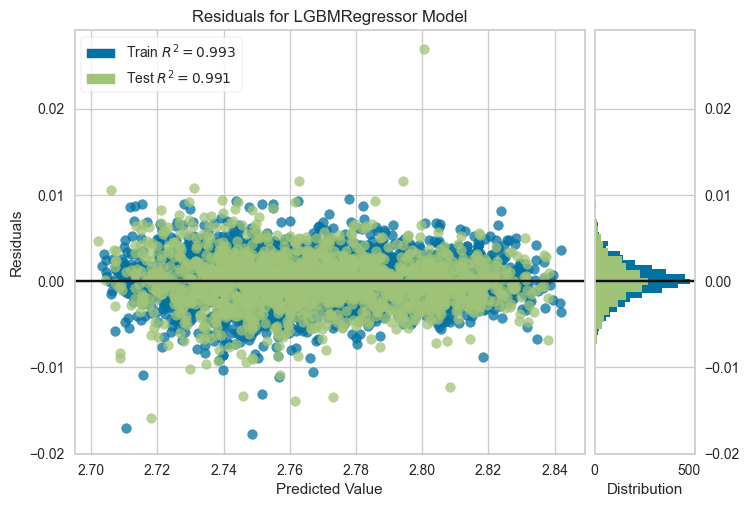

In [22]:
# Check the residuals of trained model
plot_model(best, plot = 'residuals')

In [23]:
# Finalize the model
final_best = finalize_model(best)

# Save model to disk
save_model(final_best, 'diamond_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/_9/wkm0tqns0n53w3ytpgc_68kc0000gn/T/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer'...
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                                                     'Polish',
         

### Within notebook (notice !sign infront)

In [24]:
!mlflow ui

[2023-06-29 09:28:55 +0530] [79303] [INFO] Starting gunicorn 20.1.0
[2023-06-29 09:28:55 +0530] [79303] [INFO] Listening at: http://127.0.0.1:5000 (79303)
[2023-06-29 09:28:55 +0530] [79303] [INFO] Using worker: sync
[2023-06-29 09:28:55 +0530] [79304] [INFO] Booting worker with pid: 79304
[2023-06-29 09:28:55 +0530] [79305] [INFO] Booting worker with pid: 79305
[2023-06-29 09:28:55 +0530] [79306] [INFO] Booting worker with pid: 79306
[2023-06-29 09:28:55 +0530] [79307] [INFO] Booting worker with pid: 79307
^C
[2023-06-29 09:29:25 +0530] [79303] [INFO] Handling signal: int
[2023-06-29 09:29:25 +0530] [79305] [INFO] Worker exiting (pid: 79305)
[2023-06-29 09:29:25 +0530] [79304] [INFO] Worker exiting (pid: 79304)
[2023-06-29 09:29:25 +0530] [79307] [INFO] Worker exiting (pid: 79307)
[2023-06-29 09:29:25 +0530] [79306] [INFO] Worker exiting (pid: 79306)


### On command line in the same folder 
`mlflow ui`

### Load the MLFlow model

In [ ]:
from pycaret.regression import load_model
pipeline = load_model('./saved_lr_model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
print(pipeline)

Pipeline(memory=FastMemory(location=/var/folders/_9/wkm0tqns0n53w3ytpgc_68kc0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['temp', 'rain_1h', 'snow_1h',
                                             'clouds_all', 'Rush Hour'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['holiday', 'weather_main'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['holiday', 'weather_main'],
                                    transformer=OneHotEncoder(cols=['holiday',
                                                                    'weather_main'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),


### Consume the model

In [28]:
import mlflow
logged_model = './mlruns/153243116702924659/1bd45930e43f4c50b5742beb126f4c08'

# Load model as a PyFuncModel
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame
import pandas as pd 
load_model.predict(pd.DataFrame(data))

OSError: No such file or directory: '/Users/kushalbanda/Applications/MLOPS/Phase 2/mlruns/153243116702924659/1bd45930e43f4c50b5742beb126f4c08/MLmodel'

In [ ]:
print(load_model)

### Another Method

In [29]:
pipeline = load_model('./diamond_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [30]:
print(pipeline)

Pipeline(memory=FastMemory(location=/var/folders/_9/wkm0tqns0n53w3ytpgc_68kc0000gn/T/joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer'...
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                        

In [31]:
data = get_data('diamond')

# Create a copy of data and drop Price 
data2 = data.copy()
data2.drop('Price', axis = 1, inplace = True)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [32]:
# Generate predictions
from pycaret.regression import predict_model
predictions = predict_model(pipeline, data = data2)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5421.280172
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3569.891342
2,0.85,Ideal,H,SI1,EX,EX,GIA,3341.587732
3,0.91,Ideal,E,SI1,VG,VG,GIA,4531.185124
4,0.83,Ideal,G,SI1,EX,EX,GIA,3256.250454
